

> # DownLoad Dataset



In [4]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 3.4 MB/s eta 0:00:00


In [ ]:
!wget -O /content/dataset.zip 'https://universe.roboflow.com/ds/key'

In [2]:
!unzip /content/dataset.zip -d /content/Dataset

Archive:  /content/dataset.zip
 extracting: /content/Dataset/README.dataset.txt  
 extracting: /content/Dataset/README.roboflow.txt  
 extracting: /content/Dataset/data.yaml  
   creating: /content/Dataset/train/
   creating: /content/Dataset/train/images/
 extracting: /content/Dataset/train/images/0000001_png_jpg.rf.0cd144851d07ecf2b651b731a38e17b8.jpg  
 extracting: /content/Dataset/train/images/0000002_png_jpg.rf.3710c7effccf15e5c4c6596d8acdf1ea.jpg  
 extracting: /content/Dataset/train/images/0000003_png_jpg.rf.f1c39d147b81b221a608f2234bd832c3.jpg  
 extracting: /content/Dataset/train/images/0000004_png_jpg.rf.eaa8739627fff81d462b46815c2a5bd4.jpg  
 extracting: /content/Dataset/train/images/0000006_png_jpg.rf.118f53b4cb59d885f4e88013c6ea2e8e.jpg  
 extracting: /content/Dataset/train/images/0000007_png_jpg.rf.917842da82da85fb676d7c8fc3473263.jpg  
 extracting: /content/Dataset/train/images/0000009_png_jpg.rf.9b26ea06cab36deecc7126682c95c311.jpg  
 extracting: /content/Dataset/train/



> # YAML file preparation



In [3]:
labels = ['11', '12', '13', '14', '15', '16', '17', '18', '21', '22', '23', '24', '25', '26', '27', '28', '31', '32', '33', '34', '35', '36', '37', '38', '41', '42', '43', '44', '45', '46', '47', '48', 'Crown', 'Implant', 'Root Canal']
label_mapping = {index : label for index, label in enumerate(labels)}
label_mapping

{0: '11',
 1: '12',
 2: '13',
 3: '14',
 4: '15',
 5: '16',
 6: '17',
 7: '18',
 8: '21',
 9: '22',
 10: '23',
 11: '24',
 12: '25',
 13: '26',
 14: '27',
 15: '28',
 16: '31',
 17: '32',
 18: '33',
 19: '34',
 20: '35',
 21: '36',
 22: '37',
 23: '38',
 24: '41',
 25: '42',
 26: '43',
 27: '44',
 28: '45',
 29: '46',
 30: '47',
 31: '48',
 32: 'Crown',
 33: 'Implant',
 34: 'Root Canal'}



> # Segmentation Model Training



In [5]:
from ultralytics import YOLO

model = YOLO('yolov8n-seg.pt')


100%|██████████| 6.73M/6.73M [00:00<00:00, 59.7MB/s]


In [ ]:
results = model.train(data='/content/Dataset/data.yaml', epochs=100, imgsz=640)

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=/content/runs/segment/train2/weights/best.pt, data=/content/Dataset/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

train: Scanning /content/Dataset/train/labels.cache... 452 images, 0 backgrounds, 0 corrupt: 100%|██████████| 452/452 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Dataset/valid/labels.cache... 113 images, 0 backgrounds, 0 corrupt: 100%|██████████| 113/113 [00:00<?, ?it/s]


Plotting labels to runs/segment/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000256, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.56G      2.233      3.618      3.267      1.447        275        640: 100%|██████████| 29/29 [01:13<00:00,  2.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.48s/it]


                   all        113       3363     0.0825      0.682      0.174     0.0686     0.0691      0.549      0.136     0.0482

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      9.01G      2.121      3.424      2.986      1.368        198        640: 100%|██████████| 29/29 [00:57<00:00,  1.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.71s/it]


                   all        113       3363      0.136      0.665       0.22     0.0886       0.13       0.55      0.183     0.0673

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.99G      2.102      3.398      2.845      1.358        207        640: 100%|██████████| 29/29 [00:58<00:00,  2.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.46s/it]


                   all        113       3363      0.345      0.301      0.282      0.124      0.338      0.267      0.245     0.0954

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      9.52G      2.074      3.368      2.685      1.359        173        640: 100%|██████████| 29/29 [00:57<00:00,  1.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.93s/it]


                   all        113       3363      0.269       0.44      0.258      0.118       0.25      0.398       0.23     0.0924

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.46G      2.026       3.29      2.539      1.336        251        640: 100%|██████████| 29/29 [00:57<00:00,  1.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.51s/it]


                   all        113       3363      0.296      0.416      0.283      0.126      0.279      0.389      0.251     0.0944

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      9.39G      2.053      3.315      2.449      1.366        151        640: 100%|██████████| 29/29 [00:57<00:00,  1.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.79s/it]


                   all        113       3363      0.291       0.46      0.289      0.126      0.276       0.42      0.252     0.0945

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      9.77G      2.004      3.269       2.36      1.322        193        640: 100%|██████████| 29/29 [00:58<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.49s/it]


                   all        113       3363      0.262      0.493      0.292      0.134      0.246      0.457      0.263      0.104

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.82G      1.999      3.224      2.306      1.325        367        640: 100%|██████████| 29/29 [00:56<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.84s/it]


                   all        113       3363      0.269       0.51      0.306      0.137      0.245       0.46      0.271      0.106

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.52G      1.963      3.205       2.25      1.324        113        640: 100%|██████████| 29/29 [00:56<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.56s/it]


                   all        113       3363      0.273      0.527      0.297      0.136      0.253      0.475      0.266      0.109

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      9.05G      1.947      3.184      2.181      1.327        189        640: 100%|██████████| 29/29 [00:57<00:00,  1.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.84s/it]


                   all        113       3363      0.237       0.51      0.266      0.121      0.221      0.482      0.243      0.097

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.94G      1.918      3.137      2.136      1.314        190        640: 100%|██████████| 29/29 [00:56<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.72s/it]


                   all        113       3363      0.286      0.569      0.323      0.148      0.265      0.519      0.295       0.12

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      9.75G      1.926      3.155      2.103      1.321        144        640: 100%|██████████| 29/29 [00:57<00:00,  2.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.87s/it]


                   all        113       3363      0.303      0.538      0.349      0.156      0.282      0.492       0.31      0.122

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.89G      1.915      3.156        2.1      1.305        308        640: 100%|██████████| 29/29 [00:59<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.58s/it]


                   all        113       3363      0.313      0.558      0.359      0.167      0.297      0.525      0.331      0.137

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.54G        1.9      3.116      2.048      1.308        146        640: 100%|██████████| 29/29 [00:56<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.94s/it]


                   all        113       3363      0.283      0.577       0.32      0.137      0.271      0.553      0.301      0.123

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      9.24G      1.865      3.104      2.007      1.291        171        640: 100%|██████████| 29/29 [00:58<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.57s/it]


                   all        113       3363      0.328      0.612      0.363      0.168      0.307      0.573      0.333      0.138

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.84G      1.868      3.122      1.997      1.307        172        640: 100%|██████████| 29/29 [00:56<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.83s/it]


                   all        113       3363      0.325      0.595      0.374      0.173      0.312      0.561      0.343      0.138

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.18G      1.855      3.062      1.959      1.293        136        640: 100%|██████████| 29/29 [00:57<00:00,  1.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.11s/it]


                   all        113       3363      0.369      0.607      0.422      0.197      0.348       0.57       0.39      0.164

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.39G      1.849      3.051      1.958      1.282        110        640: 100%|██████████| 29/29 [00:56<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  2.00s/it]


                   all        113       3363      0.338       0.59        0.4      0.188      0.319      0.561      0.375      0.157

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100       9.9G      1.847       3.04      1.935      1.296        165        640: 100%|██████████| 29/29 [00:58<00:00,  2.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.53s/it]


                   all        113       3363      0.363      0.615      0.405       0.19      0.347      0.576      0.378      0.155

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      9.29G      1.861      3.077      1.918      1.307        217        640: 100%|██████████| 29/29 [00:57<00:00,  1.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.93s/it]


                   all        113       3363      0.343      0.615      0.392      0.184      0.319      0.575      0.357       0.15

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.85G      1.817      3.011       1.89      1.276        343        640: 100%|██████████| 29/29 [00:58<00:00,  2.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.51s/it]


                   all        113       3363      0.367      0.627       0.42      0.201      0.351      0.592      0.384      0.161

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      10.3G      1.817      3.036      1.891      1.277        267        640: 100%|██████████| 29/29 [00:57<00:00,  1.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.91s/it]


                   all        113       3363       0.36      0.637      0.416      0.194      0.341      0.592      0.386       0.16

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.74G      1.804      2.972      1.865      1.282        167        640: 100%|██████████| 29/29 [00:57<00:00,  1.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.54s/it]


                   all        113       3363      0.391      0.642      0.457      0.216      0.363      0.601      0.419      0.173

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100       9.1G      1.831      3.027      1.863      1.272        207        640: 100%|██████████| 29/29 [00:57<00:00,  1.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.93s/it]


                   all        113       3363      0.385      0.644      0.463       0.22      0.358      0.608      0.424      0.177

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.93G       1.82      3.015      1.848      1.282        114        640: 100%|██████████| 29/29 [00:58<00:00,  2.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.58s/it]


                   all        113       3363      0.357       0.62      0.444      0.214      0.335       0.58      0.414      0.176

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      9.69G      1.792       2.96      1.829      1.263        121        640: 100%|██████████| 29/29 [00:56<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.90s/it]


                   all        113       3363      0.389      0.657      0.448      0.213      0.366      0.617       0.42      0.179

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.77G        1.8      2.978      1.809      1.274        115        640: 100%|██████████| 29/29 [00:59<00:00,  2.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.54s/it]


                   all        113       3363      0.402      0.659      0.461       0.22      0.381      0.621       0.43      0.177

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      9.55G      1.786      2.957      1.816       1.27        197        640: 100%|██████████| 29/29 [00:56<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.01s/it]


                   all        113       3363      0.389      0.682      0.432      0.202      0.364      0.643      0.402      0.164

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100       8.5G      1.779       2.92      1.775      1.249        217        640: 100%|██████████| 29/29 [00:57<00:00,  1.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.52s/it]


                   all        113       3363      0.388       0.67      0.424      0.205      0.368      0.641      0.396      0.166

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.74G      1.773      2.941      1.769      1.248        284        640: 100%|██████████| 29/29 [00:59<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.85s/it]


                   all        113       3363      0.365      0.678      0.406      0.195      0.345      0.635      0.378      0.161

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      9.12G       1.77      2.921      1.791      1.265        283        640: 100%|██████████| 29/29 [00:58<00:00,  2.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.57s/it]


                   all        113       3363      0.369      0.672      0.397      0.188      0.349      0.635      0.375      0.158

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.23G       1.77      2.925      1.762      1.262        113        640: 100%|██████████| 29/29 [00:57<00:00,  1.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.92s/it]


                   all        113       3363      0.369      0.679      0.403      0.194      0.354      0.644      0.381      0.159

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      9.24G      1.759      2.915      1.753      1.252        136        640: 100%|██████████| 29/29 [00:57<00:00,  1.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.60s/it]


                   all        113       3363      0.387       0.69      0.432      0.202      0.367      0.657      0.402      0.164

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      10.7G      1.752      2.907      1.732      1.244        208        640: 100%|██████████| 29/29 [01:01<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.93s/it]


                   all        113       3363      0.388       0.66      0.437      0.206      0.368      0.627       0.41      0.173

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      9.02G      1.771      2.897      1.758      1.262        150        640: 100%|██████████| 29/29 [00:58<00:00,  2.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.45s/it]


                   all        113       3363      0.422      0.705      0.478      0.226      0.404      0.663      0.447      0.187

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.78G      1.748      2.885       1.73      1.256        185        640: 100%|██████████| 29/29 [00:58<00:00,  2.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.03s/it]


                   all        113       3363      0.407      0.697      0.461      0.216      0.389      0.668      0.436      0.182

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      9.24G      1.743      2.891      1.731      1.242        236        640: 100%|██████████| 29/29 [00:58<00:00,  2.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.61s/it]


                   all        113       3363       0.38       0.69      0.422        0.2      0.363      0.656      0.399      0.169

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      10.7G      1.736      2.893      1.715      1.236        286        640: 100%|██████████| 29/29 [00:59<00:00,  2.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.02s/it]


                   all        113       3363      0.404      0.696      0.454      0.218      0.387      0.661      0.423      0.178

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.77G      1.749      2.896       1.71       1.26        154        640: 100%|██████████| 29/29 [00:58<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.56s/it]


                   all        113       3363      0.386      0.706      0.428      0.207      0.369       0.67      0.404      0.172

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      9.04G      1.754        2.9        1.7      1.242        214        640: 100%|██████████| 29/29 [00:59<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.99s/it]


                   all        113       3363      0.366      0.703        0.4      0.196      0.352      0.678      0.379      0.164

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      9.52G      1.723       2.86      1.701      1.243        201        640: 100%|██████████| 29/29 [00:59<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.59s/it]


                   all        113       3363      0.373      0.704      0.394      0.191      0.357      0.672      0.372      0.159

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.02G      1.722      2.865      1.694      1.244        154        640: 100%|██████████| 29/29 [00:56<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.93s/it]


                   all        113       3363      0.372      0.698      0.417      0.198      0.357      0.667      0.394      0.166

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.99G      1.696      2.816      1.683       1.24        127        640: 100%|██████████| 29/29 [00:59<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.54s/it]


                   all        113       3363      0.415      0.686      0.477      0.232        0.4      0.663       0.45      0.193

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.45G      1.718      2.856      1.675      1.229        209        640: 100%|██████████| 29/29 [00:57<00:00,  1.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.98s/it]


                   all        113       3363       0.44      0.702      0.536      0.261      0.419      0.653      0.501      0.217

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.46G      1.728      2.877      1.691      1.238        216        640: 100%|██████████| 29/29 [00:57<00:00,  1.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.55s/it]


                   all        113       3363      0.419      0.707      0.473      0.227      0.399      0.674      0.442      0.187

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.65G       1.72      2.842      1.686      1.245        135        640: 100%|██████████| 29/29 [00:56<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.52s/it]


                   all        113       3363      0.401      0.708      0.426      0.201      0.385      0.679      0.402       0.17

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      9.27G      1.698      2.832      1.683      1.224        184        640: 100%|██████████| 29/29 [00:55<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.83s/it]


                   all        113       3363      0.411      0.718      0.451      0.215      0.396       0.68      0.422      0.177

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      9.57G      1.713       2.84      1.657      1.233        172        640: 100%|██████████| 29/29 [00:56<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.42s/it]


                   all        113       3363      0.388      0.713      0.441      0.215      0.369       0.68      0.414      0.177

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.51G      1.697      2.827      1.672      1.228        150        640: 100%|██████████| 29/29 [00:54<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.66s/it]


                   all        113       3363      0.422      0.695      0.474       0.23      0.403      0.657      0.446      0.194

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      9.91G      1.693      2.813      1.641      1.226        152        640: 100%|██████████| 29/29 [00:55<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.71s/it]


                   all        113       3363      0.416      0.708      0.502      0.246      0.397      0.674      0.475      0.204

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100       8.6G      1.689      2.812      1.646      1.229        150        640: 100%|██████████| 29/29 [00:56<00:00,  1.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.52s/it]


                   all        113       3363      0.434      0.713      0.503      0.243      0.414      0.685      0.474      0.201

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      9.05G      1.705        2.8      1.664      1.246         95        640: 100%|██████████| 29/29 [00:56<00:00,  1.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.74s/it]


                   all        113       3363       0.45      0.719      0.528      0.256      0.431      0.682      0.495      0.212

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.62G      1.689       2.82      1.649      1.233        121        640: 100%|██████████| 29/29 [00:53<00:00,  1.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.71s/it]


                   all        113       3363      0.434      0.718      0.481      0.231      0.411      0.689      0.449      0.187

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.47G      1.698      2.819      1.637      1.221        186        640: 100%|██████████| 29/29 [00:56<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.46s/it]


                   all        113       3363      0.409      0.717      0.441      0.213      0.394      0.692      0.417      0.177

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.13G      1.683      2.822      1.649      1.247        135        640: 100%|██████████| 29/29 [00:54<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.82s/it]


                   all        113       3363      0.413      0.707      0.429      0.206      0.391      0.676        0.4      0.171

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.07G      1.666      2.763      1.633      1.233        114        640: 100%|██████████| 29/29 [00:55<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.45s/it]


                   all        113       3363      0.397       0.72      0.437      0.209       0.38      0.685      0.413      0.177

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.57G      1.686      2.814      1.632      1.223        230        640: 100%|██████████| 29/29 [00:56<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.45s/it]


                   all        113       3363      0.411      0.725      0.451      0.216      0.393      0.687      0.422      0.178

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      9.47G       1.68      2.784      1.615       1.23        131        640: 100%|██████████| 29/29 [00:54<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.75s/it]


                   all        113       3363      0.413      0.724      0.448      0.217      0.397      0.698      0.422      0.182

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.43G       1.68      2.792      1.604      1.218        235        640: 100%|██████████| 29/29 [00:56<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.50s/it]


                   all        113       3363      0.403      0.719      0.433      0.212      0.384      0.685      0.407      0.177

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      9.15G      1.664      2.771      1.606       1.21        279        640: 100%|██████████| 29/29 [00:56<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.40s/it]


                   all        113       3363      0.427      0.734      0.471      0.227      0.412      0.705      0.447      0.191

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.86G      1.668      2.808      1.601      1.229        226        640: 100%|██████████| 29/29 [00:55<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.80s/it]


                   all        113       3363      0.429      0.736      0.464      0.226      0.415        0.7      0.439      0.187

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.74G      1.676      2.764      1.621      1.211        143        640: 100%|██████████| 29/29 [00:57<00:00,  1.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.46s/it]


                   all        113       3363      0.417      0.723      0.451      0.218        0.4      0.693      0.427      0.183

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.23G      1.688      2.769      1.636      1.226        112        640: 100%|██████████| 29/29 [00:55<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.68s/it]


                   all        113       3363      0.426      0.723      0.473      0.226      0.406      0.696      0.446       0.19

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      9.24G      1.656      2.771      1.595      1.215        106        640: 100%|██████████| 29/29 [00:57<00:00,  1.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.53s/it]


                   all        113       3363      0.428      0.731      0.492      0.242       0.41      0.696      0.464        0.2

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      9.38G      1.673      2.763      1.592      1.206        207        640: 100%|██████████| 29/29 [00:57<00:00,  1.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.67s/it]


                   all        113       3363      0.431      0.742      0.469       0.23      0.414      0.715      0.443      0.193

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.69G      1.659      2.724      1.606      1.221         98        640: 100%|██████████| 29/29 [00:54<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.81s/it]


                   all        113       3363      0.428      0.744      0.454       0.22      0.411      0.712      0.428      0.184

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.41G      1.643       2.72      1.581      1.214        141        640: 100%|██████████| 29/29 [00:55<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.47s/it]


                   all        113       3363      0.425      0.739      0.459      0.225      0.405      0.712      0.432      0.188

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.62G      1.639      2.739      1.595      1.218        194        640: 100%|██████████| 29/29 [00:55<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.65s/it]


                   all        113       3363       0.42      0.729      0.453       0.22      0.404      0.695      0.431      0.184

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      9.39G      1.653      2.756      1.592      1.215        191        640: 100%|██████████| 29/29 [00:56<00:00,  1.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.57s/it]


                   all        113       3363      0.417      0.739      0.473      0.232      0.396      0.709      0.446      0.194

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.34G      1.646      2.722      1.578      1.213        130        640: 100%|██████████| 29/29 [00:56<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.40s/it]


                   all        113       3363       0.44      0.737      0.486      0.239      0.424      0.702      0.459      0.198

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100       8.9G      1.642       2.71      1.582      1.208        174        640: 100%|██████████| 29/29 [00:56<00:00,  1.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.88s/it]


                   all        113       3363      0.438      0.731      0.484      0.238      0.416      0.702      0.458      0.195

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      9.37G      1.656      2.734      1.589      1.222        228        640: 100%|██████████| 29/29 [00:54<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.53s/it]


                   all        113       3363      0.452      0.727      0.513      0.252      0.433      0.702      0.486      0.212

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.46G      1.647      2.752      1.575        1.2        288        640: 100%|██████████| 29/29 [00:56<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.47s/it]


                   all        113       3363       0.45      0.739      0.509       0.25      0.431       0.71      0.481      0.208

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      9.48G      1.629      2.703      1.551      1.201        192        640: 100%|██████████| 29/29 [00:55<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.81s/it]


                   all        113       3363       0.43      0.749      0.487      0.236       0.41      0.715      0.455      0.197

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.35G      1.629      2.723      1.564      1.206        116        640: 100%|██████████| 29/29 [00:56<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.38s/it]


                   all        113       3363      0.439      0.741      0.491       0.24      0.418      0.708       0.46      0.201

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      9.31G      1.642      2.725      1.584      1.215        129        640: 100%|██████████| 29/29 [00:55<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.78s/it]


                   all        113       3363      0.446      0.733      0.501      0.243      0.426      0.703      0.471      0.203

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.37G      1.645      2.751       1.59      1.218        182        640: 100%|██████████| 29/29 [00:55<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.69s/it]


                   all        113       3363      0.438      0.746      0.502      0.247      0.423       0.71      0.474      0.206

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.96G       1.63       2.71      1.558      1.193         94        640: 100%|██████████| 29/29 [00:59<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.53s/it]


                   all        113       3363      0.444      0.745      0.513      0.253      0.427      0.714      0.484      0.212

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.58G      1.624      2.694      1.567      1.197        134        640: 100%|██████████| 29/29 [00:57<00:00,  1.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.70s/it]


                   all        113       3363      0.448      0.745       0.51      0.254       0.43      0.716      0.481      0.211

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      9.41G      1.624      2.714      1.559        1.2        251        640: 100%|██████████| 29/29 [00:56<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.48s/it]


                   all        113       3363      0.442      0.745      0.472      0.229      0.425      0.714      0.444      0.191

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100       8.2G      1.629      2.726      1.566      1.197        134        640: 100%|██████████| 29/29 [00:56<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.89s/it]


                   all        113       3363      0.436      0.755      0.469      0.227       0.42      0.724      0.442       0.19

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.46G      1.634      2.709      1.555      1.211        197        640: 100%|██████████| 29/29 [00:55<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.42s/it]


                   all        113       3363       0.44      0.753      0.483      0.236      0.424      0.722      0.456      0.198

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      9.79G      1.607      2.698      1.555      1.192        116        640: 100%|██████████| 29/29 [00:56<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.55s/it]


                   all        113       3363      0.439      0.755      0.493      0.242      0.422      0.723      0.466      0.202

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.98G      1.619      2.701      1.537      1.199        150        640: 100%|██████████| 29/29 [00:55<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.80s/it]


                   all        113       3363      0.442      0.752      0.498      0.246      0.423      0.723      0.467      0.205

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.83G      1.606      2.674      1.538      1.189        107        640: 100%|██████████| 29/29 [00:57<00:00,  1.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.47s/it]


                   all        113       3363      0.444      0.754      0.495      0.245      0.423      0.719      0.463      0.205

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.65G      1.609      2.692      1.541      1.203        160        640: 100%|██████████| 29/29 [00:54<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.57s/it]


                   all        113       3363      0.449      0.758      0.497      0.241      0.429      0.724      0.464      0.202

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.48G      1.614      2.711      1.541      1.196        191        640: 100%|██████████| 29/29 [00:55<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.80s/it]


                   all        113       3363      0.441      0.761       0.48      0.234      0.425      0.731      0.452      0.197

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.85G      1.604      2.682      1.542      1.189        283        640: 100%|██████████| 29/29 [00:56<00:00,  1.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.41s/it]


                   all        113       3363      0.433      0.757      0.478      0.235      0.415      0.723      0.449      0.196

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.23G      1.604       2.68      1.557      1.193        146        640: 100%|██████████| 29/29 [00:55<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.70s/it]


                   all        113       3363      0.439      0.761      0.508      0.252      0.423      0.727      0.479      0.211

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.73G      1.614      2.704      1.548      1.192        113        640: 100%|██████████| 29/29 [00:55<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.67s/it]


                   all        113       3363      0.445      0.754      0.511      0.253      0.429      0.725      0.483      0.211
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.14G      1.594      2.674      1.505      1.257        135        640: 100%|██████████| 29/29 [00:42<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.62s/it]


                   all        113       3363      0.441      0.759       0.49      0.239      0.424       0.72      0.461        0.2

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100       6.6G      1.596      2.646      1.491      1.245        132        640: 100%|██████████| 29/29 [00:31<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.16s/it]

                   all        113       3363      0.433      0.749      0.471      0.228      0.417      0.715      0.442      0.191



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100       6.6G      1.569      2.638      1.476      1.238        122        640: 100%|██████████| 29/29 [00:30<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.70s/it]

                   all        113       3363      0.433      0.763      0.465      0.228      0.417      0.731       0.44       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.71G      1.573       2.63      1.476      1.248        132        640: 100%|██████████| 29/29 [00:30<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.19s/it]

                   all        113       3363      0.436      0.757      0.474      0.232       0.42      0.725      0.448      0.195
Stopping training early as no improvement observed in last 50 epochs. Best results observed at epoch 44, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



94 epochs completed in 1.704 hours.
Optimizer stripped from runs/segment/train3/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train3/weights/best.pt, 6.8MB

Validating runs/segment/train3/weights/best.pt...
Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3264889 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:15<00:00,  3.78s/it]


                   all        113       3363      0.439      0.702      0.537      0.261       0.42      0.651      0.501      0.217
                    11        113        107      0.468       0.71      0.521      0.219      0.411      0.589      0.477      0.196
                    12        113        106      0.363      0.511      0.399      0.161      0.334      0.443      0.376      0.148
                    13        113        102      0.437      0.686      0.459      0.219      0.383      0.578      0.368      0.123
                    14        113         98      0.379      0.704      0.457      0.218      0.287       0.51      0.296     0.0916
                    15        113         89      0.374      0.775       0.43      0.212      0.377      0.742      0.408      0.174
                    16        113         85      0.414      0.847      0.565       0.32      0.419      0.849      0.568      0.278
                    17        113         89      0.429      0.876   



> # Model Prediction



In [8]:
#pred_model = YOLO('/content/runs/segment/train3/weights/best.pt')
pred_model = YOLO('/content/best.pt')
pred_result = pred_model.predict(data='/content/Dataset/data.yaml',save=True ,imgsz=640, source= '/content/Dataset/valid/images', line_width=1, box=False)


image 1/113 /content/Dataset/valid/images/0000005_png_jpg.rf.27d5911503f69d2a54f96a156e3094d6.jpg: 640x640 1 13, 1 14, 2 15s, 2 16s, 1 17, 1 22, 1 23, 1 24, 1 25, 2 26s, 1 27, 1 34, 1 35, 1 36, 1 37, 2 46s, 2 47s, 2 48s, 494.4ms
image 2/113 /content/Dataset/valid/images/0000011_png_jpg.rf.2ade3169518f1bce12c0a976cf93a8c9.jpg: 640x640 1 11, 1 12, 2 13s, 1 14, 2 15s, 2 16s, 2 17s, 2 18s, 2 24s, 1 25, 1 26, 2 27s, 1 28, 1 31, 1 34, 1 35, 1 36, 2 38s, 1 45, 2 46s, 2 47s, 2 48s, 306.2ms
image 3/113 /content/Dataset/valid/images/0000017_png_jpg.rf.1a57a2ec8a90de930bdc47910a29fc8b.jpg: 640x640 1 11, 2 12s, 2 13s, 1 14, 1 15, 1 16, 1 17, 2 21s, 1 22, 1 23, 1 24, 2 25s, 1 26, 1 27, 1 31, 1 32, 1 33, 2 34s, 2 35s, 2 36s, 1 37, 2 38s, 2 42s, 1 43, 1 45, 1 46, 2 47s, 1 48, 283.9ms
image 4/113 /content/Dataset/valid/images/0000020_png_jpg.rf.4f8234d7b7d88084536f13f0feca8ee8.jpg: 640x640 2 13s, 1 16, 1 17, 1 27, 2 34s, 2 35s, 1 37, 1 38, 1 42, 2 47s, 1 48, 8 Crowns, 2 Implants, 3 Root Canals, 299.4



> # Visualization



In [56]:
import torch
from PIL import Image, ImageDraw
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab.patches import cv2_imshow
import random
import cv2



image 1/1 /content/Dataset/valid/images/0000448_png_jpg.rf.536741971ac1ad9e1c2e21733d18c8b3.jpg: 640x640 1 46, 1 Crown, 304.1ms
Speed: 3.9ms preprocess, 304.1ms inference, 8.7ms postprocess per image at shape (1, 3, 640, 640)


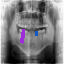


image 1/1 /content/Dataset/valid/images/0000274_png_jpg.rf.e2bb3ee10f9cba92afdee9437b231e6d.jpg: 640x640 1 16, 1 26, 1 42, 284.6ms
Speed: 3.6ms preprocess, 284.6ms inference, 18.8ms postprocess per image at shape (1, 3, 640, 640)


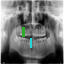


image 1/1 /content/Dataset/valid/images/0000153_png_jpg.rf.268bbe84225594068216e11ce6f738e0.jpg: 640x640 1 16, 1 17, 1 26, 1 38, 1 Crown, 1 Root Canal, 284.6ms
Speed: 4.5ms preprocess, 284.6ms inference, 22.6ms postprocess per image at shape (1, 3, 640, 640)


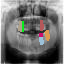


image 1/1 /content/Dataset/valid/images/0000567_png_jpg.rf.222e74190014c39ab72202db1bbc44f8.jpg: 640x640 1 13, 2 17s, 1 36, 1 47, 307.7ms
Speed: 3.6ms preprocess, 307.7ms inference, 18.9ms postprocess per image at shape (1, 3, 640, 640)


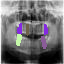


image 1/1 /content/Dataset/valid/images/0000694_png_jpg.rf.1b207e3f70c38d5c56830067140ed9fe.jpg: 640x640 1 17, 363.2ms
Speed: 4.2ms preprocess, 363.2ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)


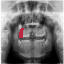


image 1/1 /content/Dataset/valid/images/0000362_png_jpg.rf.3c41b83c08beb1afcebb6a6c6d935232.jpg: 640x640 1 17, 1 18, 1 22, 1 35, 1 46, 284.4ms
Speed: 3.9ms preprocess, 284.4ms inference, 20.3ms postprocess per image at shape (1, 3, 640, 640)


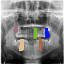


image 1/1 /content/Dataset/valid/images/0000283_png_jpg.rf.f37e7afdd0ffd646dfef3464294a7109.jpg: 640x640 1 46, 295.7ms
Speed: 3.7ms preprocess, 295.7ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)


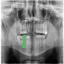


image 1/1 /content/Dataset/valid/images/0000373_png_jpg.rf.e060ed0900d85a7a737bf04ce1d8fd1c.jpg: 640x640 1 46, 1 47, 1 Crown, 291.6ms
Speed: 3.7ms preprocess, 291.6ms inference, 19.6ms postprocess per image at shape (1, 3, 640, 640)


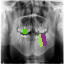


image 1/1 /content/Dataset/valid/images/0000541_png_jpg.rf.366e37d52ac6a900e3e9b3a90605cb38.jpg: 640x640 1 15, 1 37, 3 Crowns, 437.5ms
Speed: 4.2ms preprocess, 437.5ms inference, 30.7ms postprocess per image at shape (1, 3, 640, 640)


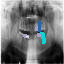


image 1/1 /content/Dataset/valid/images/0000401_png_jpg.rf.f06e75fe14153460e3d2638036544cd7.jpg: 640x640 1 15, 2 35s, 4 Crowns, 1 Implant, 1 Root Canal, 457.7ms
Speed: 3.4ms preprocess, 457.7ms inference, 51.8ms postprocess per image at shape (1, 3, 640, 640)


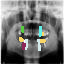


image 1/1 /content/Dataset/valid/images/0000598_png_jpg.rf.b94597c432237ef13bc6c548aaeaa82f.jpg: 640x640 1 22, 5 Crowns, 3 Root Canals, 439.5ms
Speed: 5.6ms preprocess, 439.5ms inference, 57.3ms postprocess per image at shape (1, 3, 640, 640)


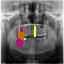


image 1/1 /content/Dataset/valid/images/0000618_png_jpg.rf.3482799c6b59da6bb4cfb6cbdac532b7.jpg: 640x640 1 42, 1 43, 3 Crowns, 2 Root Canals, 450.1ms
Speed: 4.9ms preprocess, 450.1ms inference, 41.7ms postprocess per image at shape (1, 3, 640, 640)


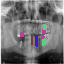


image 1/1 /content/Dataset/valid/images/0000540_png_jpg.rf.79e29f097575e4f34d23d0640c05e1f5.jpg: 640x640 1 11, 1 13, 1 15, 1 21, 1 24, 1 46, 438.2ms
Speed: 3.5ms preprocess, 438.2ms inference, 35.6ms postprocess per image at shape (1, 3, 640, 640)


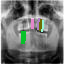


image 1/1 /content/Dataset/valid/images/0000308_png_jpg.rf.88b0bc35ce301d0fe4854cce1d734a8e.jpg: 640x640 1 12, 1 23, 1 35, 1 37, 3 Crowns, 1 Implant, 2 Root Canals, 436.7ms
Speed: 3.4ms preprocess, 436.7ms inference, 57.5ms postprocess per image at shape (1, 3, 640, 640)


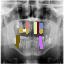


image 1/1 /content/Dataset/valid/images/0000127_png_jpg.rf.b28f9a65fd06ec0c2ce0c66d475f1c54.jpg: 640x640 1 38, 1 46, 2 47s, 440.5ms
Speed: 3.6ms preprocess, 440.5ms inference, 25.7ms postprocess per image at shape (1, 3, 640, 640)


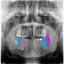


image 1/1 /content/Dataset/valid/images/0000322_png_jpg.rf.743bcce987f720075b62c35016d7afc2.jpg: 640x640 1 15, 1 23, 1 36, 1 38, 1 46, 394.2ms
Speed: 5.2ms preprocess, 394.2ms inference, 21.9ms postprocess per image at shape (1, 3, 640, 640)


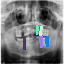


image 1/1 /content/Dataset/valid/images/0000164_png_jpg.rf.f54ef350f6bf8be670d44ff0beb9d2ef.jpg: 640x640 1 16, 1 26, 1 46, 2 Crowns, 1 Root Canal, 280.0ms
Speed: 3.6ms preprocess, 280.0ms inference, 24.1ms postprocess per image at shape (1, 3, 640, 640)


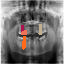


image 1/1 /content/Dataset/valid/images/0000688_png_jpg.rf.e7cf9606676d7ae079d077b378ff97b6.jpg: 640x640 1 26, 1 36, 1 46, 1 47, 294.6ms
Speed: 4.1ms preprocess, 294.6ms inference, 15.4ms postprocess per image at shape (1, 3, 640, 640)


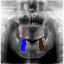


image 1/1 /content/Dataset/valid/images/0000653_png_jpg.rf.2a2a081513ad740c1c6ecd24f0551add.jpg: 640x640 1 12, 2 13s, 1 22, 1 43, 1 45, 1 46, 298.8ms
Speed: 4.1ms preprocess, 298.8ms inference, 25.5ms postprocess per image at shape (1, 3, 640, 640)


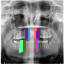


image 1/1 /content/Dataset/valid/images/0000044_png_jpg.rf.228846fa6b7dd889e9b314f59d816921.jpg: 640x640 1 16, 1 25, 1 35, 1 47, 280.1ms
Speed: 3.6ms preprocess, 280.1ms inference, 18.3ms postprocess per image at shape (1, 3, 640, 640)


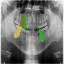


image 1/1 /content/Dataset/valid/images/0000442_png_jpg.rf.4ff730ad6fb59753acbff5e1efe03b70.jpg: 640x640 1 28, 1 36, 1 46, 1 47, 290.7ms
Speed: 3.5ms preprocess, 290.7ms inference, 15.3ms postprocess per image at shape (1, 3, 640, 640)


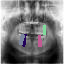


image 1/1 /content/Dataset/valid/images/0000314_png_jpg.rf.ee09a69c46a0cb26155e0e3921304145.jpg: 640x640 1 14, 2 15s, 2 26s, 1 38, 1 46, 1 47, 300.7ms
Speed: 3.4ms preprocess, 300.7ms inference, 30.9ms postprocess per image at shape (1, 3, 640, 640)


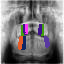


image 1/1 /content/Dataset/valid/images/0000226_png_jpg.rf.9cb6789bfd51bdc9ddfc1284a095d52d.jpg: 640x640 1 13, 1 15, 1 37, 1 46, 279.4ms
Speed: 3.4ms preprocess, 279.4ms inference, 15.9ms postprocess per image at shape (1, 3, 640, 640)


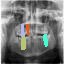


image 1/1 /content/Dataset/valid/images/0000030_png_jpg.rf.31f3365b21b3a2fa618cb17af9416524.jpg: 640x640 1 15, 1 16, 1 24, 1 26, 1 27, 1 43, 1 46, 2 Implants, 288.3ms
Speed: 3.5ms preprocess, 288.3ms inference, 31.6ms postprocess per image at shape (1, 3, 640, 640)


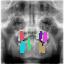


image 1/1 /content/Dataset/valid/images/0000610_png_jpg.rf.3ac99525aec783c716df875db8495684.jpg: 640x640 1 25, 1 36, 1 46, 1 47, 300.9ms
Speed: 3.6ms preprocess, 300.9ms inference, 15.6ms postprocess per image at shape (1, 3, 640, 640)


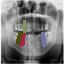


image 1/1 /content/Dataset/valid/images/0000144_png_jpg.rf.aaaeadd7e8a15e69d1ee522095e12a07.jpg: 640x640 (no detections), 283.6ms
Speed: 3.6ms preprocess, 283.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


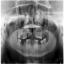


image 1/1 /content/Dataset/valid/images/0000233_png_jpg.rf.8474a24be5d5a29fd8d26b6c882e3387.jpg: 640x640 1 12, 2 16s, 1 18, 1 26, 1 47, 293.6ms
Speed: 3.7ms preprocess, 293.6ms inference, 22.1ms postprocess per image at shape (1, 3, 640, 640)


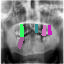


image 1/1 /content/Dataset/valid/images/0000231_png_jpg.rf.b4455df07a89550468c2ed5332081699.jpg: 640x640 1 15, 1 16, 1 34, 1 35, 1 37, 1 46, 1 47, 298.3ms
Speed: 3.4ms preprocess, 298.3ms inference, 25.5ms postprocess per image at shape (1, 3, 640, 640)


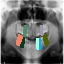


image 1/1 /content/Dataset/valid/images/0000151_png_jpg.rf.0c7792414d42e6291d55db1b7f0ed3f7.jpg: 640x640 1 37, 1 46, 1 47, 3 Crowns, 1 Implant, 1 Root Canal, 287.8ms
Speed: 3.5ms preprocess, 287.8ms inference, 29.3ms postprocess per image at shape (1, 3, 640, 640)


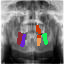


image 1/1 /content/Dataset/valid/images/0000158_png_jpg.rf.a874ed1135c4448b920026a1a6954fb2.jpg: 640x640 1 17, 1 26, 1 37, 1 47, 290.9ms
Speed: 4.4ms preprocess, 290.9ms inference, 15.9ms postprocess per image at shape (1, 3, 640, 640)


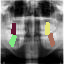


image 1/1 /content/Dataset/valid/images/0000167_png_jpg.rf.50746a0ec91e5448ac76a7de344b16d9.jpg: 640x640 1 12, 1 13, 1 37, 1 46, 303.0ms
Speed: 4.5ms preprocess, 303.0ms inference, 15.5ms postprocess per image at shape (1, 3, 640, 640)


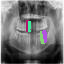


image 1/1 /content/Dataset/valid/images/0000082_png_jpg.rf.6e82d43e3676954d88d033c16f3fbe54.jpg: 640x640 1 35, 4 Crowns, 1 Root Canal, 284.4ms
Speed: 3.9ms preprocess, 284.4ms inference, 22.2ms postprocess per image at shape (1, 3, 640, 640)


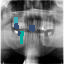


image 1/1 /content/Dataset/valid/images/0000245_png_jpg.rf.f3218473aaa23a2f1e2835540d1202be.jpg: 640x640 4 Crowns, 3 Implants, 294.8ms
Speed: 3.9ms preprocess, 294.8ms inference, 25.4ms postprocess per image at shape (1, 3, 640, 640)


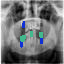


image 1/1 /content/Dataset/valid/images/0000621_png_jpg.rf.69d57bef6218046cae3dce9f8275a8bd.jpg: 640x640 1 13, 1 15, 1 23, 1 26, 1 47, 307.3ms
Speed: 3.6ms preprocess, 307.3ms inference, 22.1ms postprocess per image at shape (1, 3, 640, 640)


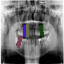


image 1/1 /content/Dataset/valid/images/0000323_png_jpg.rf.bb0cbba86f3d996d1e33188950166a31.jpg: 640x640 1 47, 3 Crowns, 2 Implants, 1 Root Canal, 283.1ms
Speed: 3.7ms preprocess, 283.1ms inference, 25.5ms postprocess per image at shape (1, 3, 640, 640)


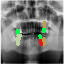


image 1/1 /content/Dataset/valid/images/0000689_png_jpg.rf.80af31f6fc89b647a9b34b6699f4d50e.jpg: 640x640 3 Crowns, 1 Implant, 295.3ms
Speed: 3.5ms preprocess, 295.3ms inference, 15.9ms postprocess per image at shape (1, 3, 640, 640)


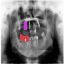


image 1/1 /content/Dataset/valid/images/0000624_png_jpg.rf.c3bb4c3662c320b0ce5fe2b09752f212.jpg: 640x640 2 16s, 1 26, 2 46s, 300.0ms
Speed: 3.6ms preprocess, 300.0ms inference, 19.2ms postprocess per image at shape (1, 3, 640, 640)


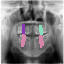


image 1/1 /content/Dataset/valid/images/0000431_png_jpg.rf.c3e1efc95543f3bf0aab0167455fee77.jpg: 640x640 1 26, 1 46, 1 47, 3 Implants, 292.6ms
Speed: 3.8ms preprocess, 292.6ms inference, 26.4ms postprocess per image at shape (1, 3, 640, 640)


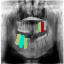


image 1/1 /content/Dataset/valid/images/0000470_png_jpg.rf.b1cccf5aa03473ab66eeb267780ce7e5.jpg: 640x640 1 15, 1 23, 1 35, 1 47, 298.6ms
Speed: 4.2ms preprocess, 298.6ms inference, 15.9ms postprocess per image at shape (1, 3, 640, 640)


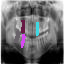


image 1/1 /content/Dataset/valid/images/0000271_png_jpg.rf.02cdaf5e83a1840e2f6e3d1ffbd21ec8.jpg: 640x640 1 11, 2 13s, 1 21, 1 47, 1 Crown, 1 Root Canal, 302.2ms
Speed: 3.4ms preprocess, 302.2ms inference, 25.5ms postprocess per image at shape (1, 3, 640, 640)


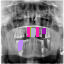


image 1/1 /content/Dataset/valid/images/0000434_png_jpg.rf.c64e77e3f9ed6b5e83da43d7c9fe0c38.jpg: 640x640 1 42, 295.1ms
Speed: 4.2ms preprocess, 295.1ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)


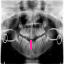


image 1/1 /content/Dataset/valid/images/0000203_png_jpg.rf.4370901368f2a383750a9aba87a54f5b.jpg: 640x640 1 37, 1 38, 1 44, 1 47, 2 Crowns, 1 Root Canal, 297.9ms
Speed: 3.5ms preprocess, 297.9ms inference, 26.0ms postprocess per image at shape (1, 3, 640, 640)


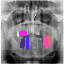


image 1/1 /content/Dataset/valid/images/0000521_png_jpg.rf.7c63bac2ddeaf3d82bcb1255f9efa50b.jpg: 640x640 1 12, 1 16, 1 35, 1 43, 1 46, 302.7ms
Speed: 3.6ms preprocess, 302.7ms inference, 18.8ms postprocess per image at shape (1, 3, 640, 640)


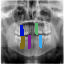


image 1/1 /content/Dataset/valid/images/0000611_png_jpg.rf.fd5c8fbe596fcea4c4ca700ec3d3f4d9.jpg: 640x640 1 Root Canal, 291.4ms
Speed: 3.6ms preprocess, 291.4ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)


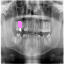


image 1/1 /content/Dataset/valid/images/0000426_png_jpg.rf.40d108098166d592522a6af43c8f5fa3.jpg: 640x640 1 26, 1 35, 2 Crowns, 1 Root Canal, 303.7ms
Speed: 3.8ms preprocess, 303.7ms inference, 21.1ms postprocess per image at shape (1, 3, 640, 640)


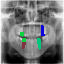


image 1/1 /content/Dataset/valid/images/0000255_png_jpg.rf.5cb8de32c73f890f42c945a637591ed3.jpg: 640x640 1 15, 1 16, 1 17, 1 25, 1 26, 2 36s, 1 37, 439.0ms
Speed: 3.7ms preprocess, 439.0ms inference, 45.5ms postprocess per image at shape (1, 3, 640, 640)


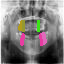


image 1/1 /content/Dataset/valid/images/0000585_png_jpg.rf.a4359a8475a4702499260d3ba6288e1d.jpg: 640x640 (no detections), 464.7ms
Speed: 3.9ms preprocess, 464.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


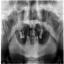


image 1/1 /content/Dataset/valid/images/0000092_png_jpg.rf.0bc18a07fa94201bb79397aa74810fd0.jpg: 640x640 1 35, 1 Crown, 3 Implants, 1 Root Canal, 439.1ms
Speed: 3.8ms preprocess, 439.1ms inference, 35.8ms postprocess per image at shape (1, 3, 640, 640)


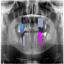


image 1/1 /content/Dataset/valid/images/0000495_png_jpg.rf.62cb83ea30add681566638f65ab2d7ca.jpg: 640x640 6 Crowns, 436.5ms
Speed: 3.4ms preprocess, 436.5ms inference, 36.6ms postprocess per image at shape (1, 3, 640, 640)


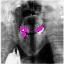


image 1/1 /content/Dataset/valid/images/0000133_png_jpg.rf.79e471f2ee885b0961914765bc35df6b.jpg: 640x640 1 35, 1 45, 2 Crowns, 2 Implants, 2 Root Canals, 459.6ms
Speed: 4.2ms preprocess, 459.6ms inference, 46.4ms postprocess per image at shape (1, 3, 640, 640)


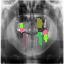


image 1/1 /content/Dataset/valid/images/0000690_png_jpg.rf.239e656635bbc29d4ec12c8cf6a2998e.jpg: 640x640 1 46, 1 47, 450.2ms
Speed: 3.5ms preprocess, 450.2ms inference, 14.0ms postprocess per image at shape (1, 3, 640, 640)


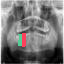


image 1/1 /content/Dataset/valid/images/0000320_png_jpg.rf.b29990f2441f41987423d6db63098c67.jpg: 640x640 2 15s, 1 17, 1 26, 2 46s, 472.0ms
Speed: 3.3ms preprocess, 472.0ms inference, 38.4ms postprocess per image at shape (1, 3, 640, 640)


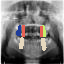


image 1/1 /content/Dataset/valid/images/0000569_png_jpg.rf.fecc109704a990be4899f2dc9a8c0c71.jpg: 640x640 3 Crowns, 1 Implant, 582.2ms
Speed: 3.6ms preprocess, 582.2ms inference, 31.5ms postprocess per image at shape (1, 3, 640, 640)


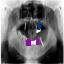


image 1/1 /content/Dataset/valid/images/0000132_png_jpg.rf.720151b70098531d8c098b39c6ccbed4.jpg: 640x640 1 26, 4 Crowns, 2 Root Canals, 508.1ms
Speed: 4.2ms preprocess, 508.1ms inference, 45.9ms postprocess per image at shape (1, 3, 640, 640)


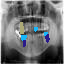


image 1/1 /content/Dataset/valid/images/0000011_png_jpg.rf.2ade3169518f1bce12c0a976cf93a8c9.jpg: 640x640 1 13, 1 14, 1 15, 2 46s, 1 47, 302.9ms
Speed: 3.6ms preprocess, 302.9ms inference, 22.1ms postprocess per image at shape (1, 3, 640, 640)


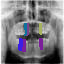


image 1/1 /content/Dataset/valid/images/0000443_png_jpg.rf.79141478b2a3e96b1ed1f5e491d542e7.jpg: 640x640 2 15s, 429.1ms
Speed: 3.6ms preprocess, 429.1ms inference, 14.5ms postprocess per image at shape (1, 3, 640, 640)


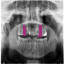


image 1/1 /content/Dataset/valid/images/0000501_png_jpg.rf.63eea0a85541001551111a06c4e74c0c.jpg: 640x640 2 Crowns, 1 Implant, 506.2ms
Speed: 3.6ms preprocess, 506.2ms inference, 28.3ms postprocess per image at shape (1, 3, 640, 640)


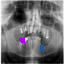


image 1/1 /content/Dataset/valid/images/0000445_png_jpg.rf.3bdafafe0bcbd61d52c2aa1a32b8f264.jpg: 640x640 1 16, 1 37, 6 Crowns, 2 Root Canals, 504.6ms
Speed: 4.7ms preprocess, 504.6ms inference, 74.0ms postprocess per image at shape (1, 3, 640, 640)


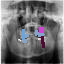


image 1/1 /content/Dataset/valid/images/0000343_png_jpg.rf.2b31d32a60faa04266fb607f9833de4c.jpg: 640x640 1 36, 1 37, 1 Crown, 367.8ms
Speed: 4.5ms preprocess, 367.8ms inference, 18.8ms postprocess per image at shape (1, 3, 640, 640)


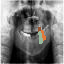


image 1/1 /content/Dataset/valid/images/0000358_png_jpg.rf.2a068aac675532b3649d0009a01e5d0d.jpg: 640x640 1 13, 1 15, 1 18, 1 23, 1 24, 1 36, 1 37, 1 38, 1 45, 1 46, 1 47, 295.5ms
Speed: 3.6ms preprocess, 295.5ms inference, 43.8ms postprocess per image at shape (1, 3, 640, 640)


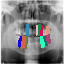


image 1/1 /content/Dataset/valid/images/0000169_png_jpg.rf.2b60d21b117abc200c677467c83711a2.jpg: 640x640 5 Crowns, 1 Root Canal, 295.6ms
Speed: 3.7ms preprocess, 295.6ms inference, 22.1ms postprocess per image at shape (1, 3, 640, 640)


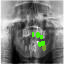


image 1/1 /content/Dataset/valid/images/0000473_png_jpg.rf.dd9e9065fb38cd5c6772c3c660bc6dbe.jpg: 640x640 (no detections), 298.7ms
Speed: 3.8ms preprocess, 298.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


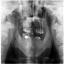


image 1/1 /content/Dataset/valid/images/0000372_png_jpg.rf.c4836827a9362b39e3a3f66357a7a666.jpg: 640x640 1 15, 1 16, 1 17, 1 21, 1 23, 1 38, 291.5ms
Speed: 4.1ms preprocess, 291.5ms inference, 27.3ms postprocess per image at shape (1, 3, 640, 640)


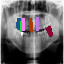


image 1/1 /content/Dataset/valid/images/0000212_png_jpg.rf.5128f32b0ebdc4423d3df04a267ac591.jpg: 640x640 2 13s, 1 14, 2 15s, 1 16, 2 35s, 3 Crowns, 1 Root Canal, 312.9ms
Speed: 4.1ms preprocess, 312.9ms inference, 42.0ms postprocess per image at shape (1, 3, 640, 640)


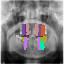


image 1/1 /content/Dataset/valid/images/0000432_png_jpg.rf.cfcd9a54351730750eda44d5f8dd44ea.jpg: 640x640 1 13, 1 35, 1 36, 294.2ms
Speed: 5.0ms preprocess, 294.2ms inference, 18.8ms postprocess per image at shape (1, 3, 640, 640)


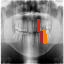


image 1/1 /content/Dataset/valid/images/0000480_png_jpg.rf.cc4139a0f37717f04121a3cadf11389c.jpg: 640x640 2 46s, 2 47s, 300.3ms
Speed: 3.8ms preprocess, 300.3ms inference, 27.4ms postprocess per image at shape (1, 3, 640, 640)


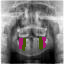


image 1/1 /content/Dataset/valid/images/0000595_png_jpg.rf.d75a61638ce58df1fd91efae42ac17a5.jpg: 640x640 1 16, 1 26, 1 45, 299.2ms
Speed: 3.4ms preprocess, 299.2ms inference, 19.2ms postprocess per image at shape (1, 3, 640, 640)


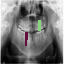


image 1/1 /content/Dataset/valid/images/0000586_png_jpg.rf.570b42de02cdd6314ace8eaa6274dc35.jpg: 640x640 1 21, 1 24, 1 26, 1 33, 1 34, 1 35, 1 36, 1 37, 298.9ms
Speed: 3.5ms preprocess, 298.9ms inference, 28.4ms postprocess per image at shape (1, 3, 640, 640)


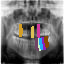


image 1/1 /content/Dataset/valid/images/0000115_png_jpg.rf.ba5d946f0e50d1aeda7aae917c788f99.jpg: 640x640 1 37, 1 46, 4 Crowns, 1 Root Canal, 318.2ms
Speed: 3.5ms preprocess, 318.2ms inference, 30.0ms postprocess per image at shape (1, 3, 640, 640)


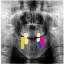


image 1/1 /content/Dataset/valid/images/0000430_png_jpg.rf.590d1a98504ebceb6197dd27a7bca808.jpg: 640x640 1 46, 294.8ms
Speed: 3.7ms preprocess, 294.8ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)


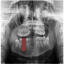


image 1/1 /content/Dataset/valid/images/0000512_png_jpg.rf.fad2cd20baa865535cca5d2cbf95464f.jpg: 640x640 1 37, 3 Crowns, 2 Root Canals, 300.9ms
Speed: 3.5ms preprocess, 300.9ms inference, 22.4ms postprocess per image at shape (1, 3, 640, 640)


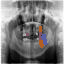


image 1/1 /content/Dataset/valid/images/0000542_png_jpg.rf.51adc5d0b5143113ddf874563cba1554.jpg: 640x640 1 21, 1 22, 1 23, 1 34, 1 35, 1 37, 1 38, 1 46, 313.0ms
Speed: 3.7ms preprocess, 313.0ms inference, 30.0ms postprocess per image at shape (1, 3, 640, 640)


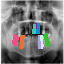


image 1/1 /content/Dataset/valid/images/0000183_png_jpg.rf.0675ea9590390e44e54bbb00f0b7e29b.jpg: 640x640 1 16, 1 26, 1 37, 1 47, 299.2ms
Speed: 4.2ms preprocess, 299.2ms inference, 16.0ms postprocess per image at shape (1, 3, 640, 640)


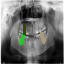


image 1/1 /content/Dataset/valid/images/0000294_png_jpg.rf.c504754ac7f7fd785b3950d54501f384.jpg: 640x640 1 15, 1 16, 2 26s, 1 38, 1 46, 300.4ms
Speed: 3.5ms preprocess, 300.4ms inference, 22.1ms postprocess per image at shape (1, 3, 640, 640)


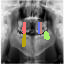


image 1/1 /content/Dataset/valid/images/0000187_png_jpg.rf.ac05ab919f41233b3ccdf384eeeffd90.jpg: 640x640 2 12s, 1 15, 1 16, 2 23s, 320.9ms
Speed: 3.6ms preprocess, 320.9ms inference, 22.5ms postprocess per image at shape (1, 3, 640, 640)


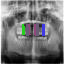


image 1/1 /content/Dataset/valid/images/0000450_png_jpg.rf.643a98227659399849cf08537cbc89b5.jpg: 640x640 (no detections), 308.1ms
Speed: 3.4ms preprocess, 308.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


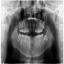


image 1/1 /content/Dataset/valid/images/0000020_png_jpg.rf.4f8234d7b7d88084536f13f0feca8ee8.jpg: 640x640 1 35, 1 37, 4 Crowns, 1 Implant, 1 Root Canal, 294.4ms
Speed: 3.7ms preprocess, 294.4ms inference, 28.6ms postprocess per image at shape (1, 3, 640, 640)


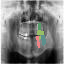


image 1/1 /content/Dataset/valid/images/0000399_png_jpg.rf.d7ef7b8e4613a6541d3060bcca713b51.jpg: 640x640 1 23, 1 24, 1 35, 1 Crown, 1 Root Canal, 313.9ms
Speed: 3.5ms preprocess, 313.9ms inference, 20.5ms postprocess per image at shape (1, 3, 640, 640)


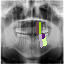


image 1/1 /content/Dataset/valid/images/0000649_png_jpg.rf.0c5d3a9cc342160c63383578b71f4cf3.jpg: 640x640 1 26, 3 Crowns, 1 Root Canal, 312.5ms
Speed: 3.5ms preprocess, 312.5ms inference, 18.8ms postprocess per image at shape (1, 3, 640, 640)


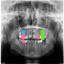


image 1/1 /content/Dataset/valid/images/0000564_png_jpg.rf.7a0c2db64229b979272ae30fc9891f7f.jpg: 640x640 1 37, 1 38, 293.0ms
Speed: 4.3ms preprocess, 293.0ms inference, 8.9ms postprocess per image at shape (1, 3, 640, 640)


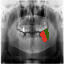


image 1/1 /content/Dataset/valid/images/0000138_png_jpg.rf.80c20ecd3226f6968f3aa498da004b2e.jpg: 640x640 1 26, 1 47, 350.1ms
Speed: 3.7ms preprocess, 350.1ms inference, 15.0ms postprocess per image at shape (1, 3, 640, 640)


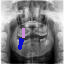


image 1/1 /content/Dataset/valid/images/0000190_png_jpg.rf.541756551d3770507345072cb336e737.jpg: 640x640 1 12, 1 13, 1 15, 1 16, 1 17, 1 23, 1 24, 1 26, 1 37, 1 47, 466.4ms
Speed: 3.5ms preprocess, 466.4ms inference, 59.5ms postprocess per image at shape (1, 3, 640, 640)


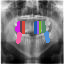


image 1/1 /content/Dataset/valid/images/0000100_png_jpg.rf.e66a2a212efa70eb1ed37e3658848ca7.jpg: 640x640 1 18, 1 21, 1 22, 1 26, 1 34, 1 35, 1 36, 458.7ms
Speed: 6.7ms preprocess, 458.7ms inference, 44.1ms postprocess per image at shape (1, 3, 640, 640)


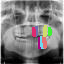


image 1/1 /content/Dataset/valid/images/0000601_png_jpg.rf.bd07bbcac42f6f0ec2a9faeb88586d7b.jpg: 640x640 1 26, 1 35, 1 36, 1 37, 1 38, 423.4ms
Speed: 3.9ms preprocess, 423.4ms inference, 30.7ms postprocess per image at shape (1, 3, 640, 640)


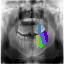


image 1/1 /content/Dataset/valid/images/0000635_png_jpg.rf.207b1af824094e01d532a7bafbaf78c2.jpg: 640x640 1 Crown, 1 Root Canal, 447.0ms
Speed: 3.4ms preprocess, 447.0ms inference, 14.3ms postprocess per image at shape (1, 3, 640, 640)


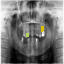


image 1/1 /content/Dataset/valid/images/0000223_png_jpg.rf.961e9e1120648067a904e61e764f9b07.jpg: 640x640 1 26, 1 27, 1 35, 1 36, 2 38s, 454.8ms
Speed: 3.7ms preprocess, 454.8ms inference, 36.1ms postprocess per image at shape (1, 3, 640, 640)


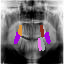


image 1/1 /content/Dataset/valid/images/0000437_png_jpg.rf.2fcd812a4ad5ff9b490160d8f73cebdd.jpg: 640x640 1 37, 1 46, 2 Crowns, 453.0ms
Speed: 3.6ms preprocess, 453.0ms inference, 28.3ms postprocess per image at shape (1, 3, 640, 640)


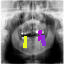


image 1/1 /content/Dataset/valid/images/0000452_png_jpg.rf.255d9c6639613c284e9fe369e0d93d36.jpg: 640x640 1 15, 1 16, 1 18, 1 25, 1 26, 1 34, 1 35, 1 37, 1 38, 1 46, 1 47, 1 48, 446.1ms
Speed: 3.6ms preprocess, 446.1ms inference, 67.6ms postprocess per image at shape (1, 3, 640, 640)


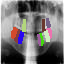


image 1/1 /content/Dataset/valid/images/0000606_png_jpg.rf.995ff98c3235e60689569fa5a0eaddd8.jpg: 640x640 1 36, 1 38, 1 47, 4 Crowns, 395.3ms
Speed: 4.3ms preprocess, 395.3ms inference, 36.3ms postprocess per image at shape (1, 3, 640, 640)


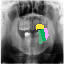


image 1/1 /content/Dataset/valid/images/0000275_png_jpg.rf.b1f4cd7a4974409ce677aa4e1e00139c.jpg: 640x640 2 35s, 1 37, 1 38, 1 Crown, 296.1ms
Speed: 3.6ms preprocess, 296.1ms inference, 18.8ms postprocess per image at shape (1, 3, 640, 640)


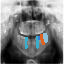


image 1/1 /content/Dataset/valid/images/0000444_png_jpg.rf.caeccc0082d588b187623c1967e820a6.jpg: 640x640 1 25, 1 26, 1 35, 1 43, 1 44, 300.1ms
Speed: 3.7ms preprocess, 300.1ms inference, 18.7ms postprocess per image at shape (1, 3, 640, 640)


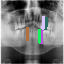


image 1/1 /content/Dataset/valid/images/0000405_png_jpg.rf.f3907c76d582717047f27b2e66f30785.jpg: 640x640 3 Crowns, 1 Root Canal, 310.8ms
Speed: 4.0ms preprocess, 310.8ms inference, 16.8ms postprocess per image at shape (1, 3, 640, 640)


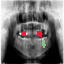


image 1/1 /content/Dataset/valid/images/0000614_png_jpg.rf.baf0b344b77a8221fd37ae50e4d78d13.jpg: 640x640 1 13, 1 14, 1 24, 304.4ms
Speed: 3.4ms preprocess, 304.4ms inference, 18.7ms postprocess per image at shape (1, 3, 640, 640)


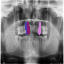


image 1/1 /content/Dataset/valid/images/0000674_png_jpg.rf.e2b188f4af8933bdcd227835a4546baa.jpg: 640x640 1 16, 1 Implant, 302.4ms
Speed: 3.6ms preprocess, 302.4ms inference, 9.0ms postprocess per image at shape (1, 3, 640, 640)


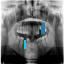


image 1/1 /content/Dataset/valid/images/0000333_png_jpg.rf.19e012e5f99096fa2ec382e0b1fb7393.jpg: 640x640 1 37, 1 38, 332.2ms
Speed: 3.5ms preprocess, 332.2ms inference, 8.8ms postprocess per image at shape (1, 3, 640, 640)


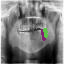


image 1/1 /content/Dataset/valid/images/0000257_png_jpg.rf.a95fcbc53711373f9ba394e5f0cfa1dc.jpg: 640x640 1 11, 1 12, 1 17, 1 21, 1 22, 1 35, 1 43, 1 46, 310.4ms
Speed: 3.6ms preprocess, 310.4ms inference, 28.3ms postprocess per image at shape (1, 3, 640, 640)


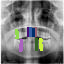


image 1/1 /content/Dataset/valid/images/0000161_png_jpg.rf.ce51e0e3d7158685a04d453e6c8b4112.jpg: 640x640 1 46, 1 47, 303.6ms
Speed: 3.4ms preprocess, 303.6ms inference, 8.5ms postprocess per image at shape (1, 3, 640, 640)


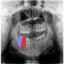


image 1/1 /content/Dataset/valid/images/0000673_png_jpg.rf.4d2cd37e554f6083e89fd7a2ac7f3c9e.jpg: 640x640 5 Crowns, 1 Root Canal, 318.7ms
Speed: 3.5ms preprocess, 318.7ms inference, 23.6ms postprocess per image at shape (1, 3, 640, 640)


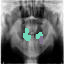


image 1/1 /content/Dataset/valid/images/0000295_png_jpg.rf.a496a8b9adf0c5718e3764b47ad8f3bc.jpg: 640x640 2 Crowns, 305.9ms
Speed: 3.6ms preprocess, 305.9ms inference, 9.6ms postprocess per image at shape (1, 3, 640, 640)


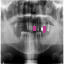


image 1/1 /content/Dataset/valid/images/0000494_png_jpg.rf.488250bdb6da9e7da1a2d1cc093e15d4.jpg: 640x640 1 11, 2 12s, 1 15, 1 16, 1 21, 1 26, 307.1ms
Speed: 3.7ms preprocess, 307.1ms inference, 25.7ms postprocess per image at shape (1, 3, 640, 640)


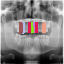


image 1/1 /content/Dataset/valid/images/0000005_png_jpg.rf.27d5911503f69d2a54f96a156e3094d6.jpg: 640x640 1 16, 1 35, 1 46, 1 47, 323.6ms
Speed: 3.6ms preprocess, 323.6ms inference, 15.7ms postprocess per image at shape (1, 3, 640, 640)


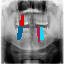


image 1/1 /content/Dataset/valid/images/0000284_png_jpg.rf.490509cd1f8449df0c12e47e80703fcf.jpg: 640x640 1 12, 1 13, 1 15, 1 16, 1 23, 1 24, 1 26, 298.5ms
Speed: 3.6ms preprocess, 298.5ms inference, 25.4ms postprocess per image at shape (1, 3, 640, 640)


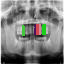


image 1/1 /content/Dataset/valid/images/0000328_png_jpg.rf.0affa197f8c53f2d44122404054da30a.jpg: 640x640 1 17, 1 46, 1 47, 303.5ms
Speed: 3.5ms preprocess, 303.5ms inference, 18.7ms postprocess per image at shape (1, 3, 640, 640)


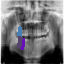


image 1/1 /content/Dataset/valid/images/0000248_png_jpg.rf.ef838c07bc6194fa54602e1b063fa06d.jpg: 640x640 (no detections), 327.5ms
Speed: 3.6ms preprocess, 327.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


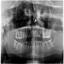


image 1/1 /content/Dataset/valid/images/0000097_png_jpg.rf.90bb033ad1ffe45f0b3866188415cdeb.jpg: 640x640 3 Implants, 304.3ms
Speed: 3.4ms preprocess, 304.3ms inference, 18.6ms postprocess per image at shape (1, 3, 640, 640)


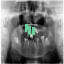


image 1/1 /content/Dataset/valid/images/0000247_png_jpg.rf.d322dcd17375a5a0d0caefdf98ed7587.jpg: 640x640 1 16, 1 47, 2 Crowns, 1 Root Canal, 306.5ms
Speed: 3.4ms preprocess, 306.5ms inference, 19.1ms postprocess per image at shape (1, 3, 640, 640)


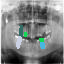


image 1/1 /content/Dataset/valid/images/0000129_png_jpg.rf.aa32b1c1a534059f25204cdd3abfa504.jpg: 640x640 1 48, 3 Crowns, 2 Root Canals, 328.3ms
Speed: 3.4ms preprocess, 328.3ms inference, 22.8ms postprocess per image at shape (1, 3, 640, 640)


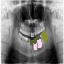


image 1/1 /content/Dataset/valid/images/0000346_png_jpg.rf.06b893e5dc76b5a4f8950dfb631c168b.jpg: 640x640 1 11, 1 13, 1 15, 1 17, 1 47, 1 48, 309.9ms
Speed: 3.5ms preprocess, 309.9ms inference, 22.1ms postprocess per image at shape (1, 3, 640, 640)


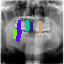


image 1/1 /content/Dataset/valid/images/0000036_png_jpg.rf.d13ba55d928cd4871619567963b42170.jpg: 640x640 1 17, 1 43, 1 47, 3 Crowns, 306.0ms
Speed: 3.5ms preprocess, 306.0ms inference, 25.4ms postprocess per image at shape (1, 3, 640, 640)


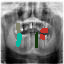


image 1/1 /content/Dataset/valid/images/0000017_png_jpg.rf.1a57a2ec8a90de930bdc47910a29fc8b.jpg: 640x640 1 11, 2 12s, 1 14, 1 15, 1 17, 1 21, 1 22, 1 23, 1 25, 1 34, 1 35, 318.4ms
Speed: 3.9ms preprocess, 318.4ms inference, 42.3ms postprocess per image at shape (1, 3, 640, 640)


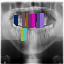


image 1/1 /content/Dataset/valid/images/0000692_png_jpg.rf.86d92c769f94a311c66374c4f3534aee.jpg: 640x640 2 13s, 1 15, 1 47, 3 Crowns, 293.7ms
Speed: 3.5ms preprocess, 293.7ms inference, 25.0ms postprocess per image at shape (1, 3, 640, 640)


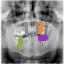


image 1/1 /content/Dataset/valid/images/0000573_png_jpg.rf.401f5cbe79bce9cd8fb89ba53d059c09.jpg: 640x640 1 13, 1 15, 1 22, 1 35, 1 37, 1 46, 307.4ms
Speed: 3.8ms preprocess, 307.4ms inference, 22.1ms postprocess per image at shape (1, 3, 640, 640)


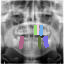


image 1/1 /content/Dataset/valid/images/0000589_png_jpg.rf.99dab42ce6e48dbdeb9aeda16982aa91.jpg: 640x640 1 11, 1 13, 1 15, 1 16, 1 25, 1 26, 1 35, 1 37, 315.2ms
Speed: 3.5ms preprocess, 315.2ms inference, 29.1ms postprocess per image at shape (1, 3, 640, 640)


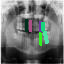

In [55]:
model = YOLO("/content/best.pt")
def seg(img_path):
  img = cv2.imread(img_path)


  yolo_classes = list(model.names.values())
  classes_ids = [yolo_classes.index(clas) for clas in yolo_classes]

  conf = 0.5

  results = model.predict(data='/content/Dataset/data.yaml', source=img_path, conf=conf)
  colors = [random.choices(range(256), k=3) for _ in classes_ids]

  for result in results:
    try:
      for mask, box in zip(result.masks.xy, result.boxes):
        points = np.int32([mask])
        cv2.polylines(img, points, True, (255, 0, 0), 1)
        color_number = classes_ids.index(int(box.cls[0]))
        cv2.fillPoly(img, points, colors[color_number])
    except:
      pass

  cv2_imshow(img)
  cv2.waitKey(0)



file_list = os.listdir('/content/Dataset/valid/images')
for img_file in file_list:
  seg(f'/content/Dataset/valid/images/{img_file}')



> Visualization works on Jupiter



In [18]:

def show_prediction_colab(image_path, predictions, class_names):


    image = Image.open(image_path).convert('RGB')
    draw = ImageDraw.Draw(image)
    image_width, image_height = image.size
    transform = transforms.Compose([transforms.ToTensor()])

    for pred in predictions:
      boxes = pred.boxes.xyxy
      labels = pred.boxes.cls
      scores = pred.boxes.conf

      for box, label, score in zip(boxes, labels, scores):
          # Convert YOLO box format (x_center, y_center, width, height) to (x_min, y_min, x_max, y_max)
          x_center, y_center, width, height = box
          x_min = int((x_center - width / 2) * image_width)
          y_min = int((y_center - height / 2) * image_height)
          x_max = int((x_center + width / 2) * image_width)
          y_max = int((y_center + height / 2) * image_height)

          # Draw bounding box
          draw.rectangle([x_min, y_min, x_max, y_max], outline="green", width=4)

          # Draw label with confidence score
          class_name = class_names[label]
          label_text = f"{class_name} ({score:.2f})"
          draw.text((x_min, y_min - 15), label_text, fill="white")
      # Display the image
      plt.imshow(np.asarray(image))
      plt.axis('off')
      plt.show()


In [ ]:
def show_predictions_for_directory_colab(directory_path, model, class_names):

    image_files = [f for f in os.listdir(directory_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]
    for image_file in image_files:

        image_path = os.path.join(directory_path, image_file)

        predictions = model.predict(data='/content/Dataset/data.yaml', source=image_path ,imgsz=640)

        show_prediction_colab(image_path, predictions, class_names)


directory_path = '/content/Dataset/valid/images'

class_names = ['11', '12', '13', '14', '15', '16', '17', '18', '21', '22', '23', '24', '25', '26', '27', '28', '31', '32', '33', '34', '35', '36', '37', '38', '41', '42', '43', '44', '45', '46', '47', '48', 'Crown', 'Implant', 'Root Canal']

pred_model = YOLO('/content/best.pt')

show_predictions_for_directory_colab(directory_path, pred_model, class_names)

